# The three basic types of problems
## Artificial Intelligence 1
### Lecture 1, part 2
Jim Smith

# The Big Idea
(parts of) computers do things in a sequence

<div >
<div style="float:left; width: 25%;">
    <h3>Input</h3> 
    <ul>
        <li>keyboard</li>
        <li> mouse</li>
        <li> joystick</li>
        <li> camera</li>
        <li>microphone</li>
        <li><b> another computer or programme</b></li>
     </ul>
  </div>
 
    
 <div style = "float:left;width:5%">
 <br><br><br>   <span style='font-size:50px;'>&#8680;</span>
 </div>
    
<div  style="float:left; width:30%;background:lightblue">
    <h3>Model</h3>
    of a process or part of the world
    <ul>
        <li>designed by a person</li>
        <li> or learned by an algorithm</li>
    </ul>
</div>

<div style = "float:left;width:5%">
 <br><br><br>   <span style='font-size:50px;'>&#8680;</span>
</div>

 <div style="float:left; width:25%">
    <h3>Output</h3> 
    <ul>
        <li>screen</li>
        <li> motor</li>
        <li>loudspeaker</li>
        <li><b> another computer or programme</b></li>
     </ul>
</div>
<br style="clear:left;"/>        
 </div>




## For example, this notebook is just a model.

Made of up some 
- generic parts: markdown, html, reveal.js, python
- and some specific parts: the slide content 

The inputs are my mouse/keyboard presses.

### But a call to a simple function also fits this viewpoint.

In [ ]:
input = 'this is a message to show'

"""
print() is a model 
of the process of drawing 
something on screen
 it's much easier than 
worrying about pixels!
"""
print(str.upper( input))

# Big Idea Part 2:
Problem Solving <==> one of the three parts is missing.

Different types of problem are associated with different questions.

<div >
<div style="float:left; width: 30%;">
    <h3>Input</h3> 
    <ul>
        <li>how do I?</li>
        <li> what's the best/quickest/...?</li>
     </ul>
  </div>

 <div style = "float:left;width:5%">
<br> <br>.
 </div>

    
    
<div style="float:left; width:30%;background:lightblue">
    <h3>Model</h3>
    <ul>
        <li>how does X relate to Y?</li>
        <li>how do these symptons link to diagnosis?</li>
    </ul>
</div>

<div style = "float:left;width:5%">
<br> <br>.
 </div>
    
 <div style="float:left; width:30%">
  <h3>Output</h3> 
    <ul>
        <li>who/what is this?</li>
        <li> what will happen if ...?</li>
        <li>what will the ... be tomorrow?</li>
     </ul>
</div>
<br style="clear:left;"/>        
 </div>

# So we can define three types of problem

<div >
<div style="float:left; width: 30%;border:2px">
    <h3>Optimisation</h3>
    <b>Given</b>
    <ul>
        <li>A model of the situation</li>
        <li>Some constraints about the output</li>
     </ul>
    <b>Find</b> the  inputs that produce the desired output.
    <br><small>Sometimes called <b><i>planning</i></b> when the answer is a sequence of inputs.</small>
  </div>
 
<div style = "float:left;width:5%">
<br> <br>.
 </div>
    
<div  style="float:left; width:30%;background:lightblue">
    <h3>Modelling</h3>
    <b>Given</b>:
    <ul>
        <li> A set of inputs (examples)</li>
        <li> corresponding outputs/labels</li>
       </ul>
    <br>
    <b>Find</b> the model that:
       <ul>
        <li>Maps the known inputs onto their outputs</li>
           <li> And generalises to new cases</li>
       </ul>
</div>


 <div style = "float:left;width:5%">
<br> <br>.
 </div>


 <div style="float:left; width:30%">
  <h3>Prediction</h3> 
     <b>Given</b>:
    <ul>
        <li>a model of the situation / process</li>
        <li> some inputs</li>
     </ul>
     <b>Find</b> the correct output (prediction)
</div>
<br style="clear:left;"/>        
 </div>

# Optimisation Example: Travelling Salesperson Problem
Work out the quickest way to visit a set of cities, going through each exactly once.

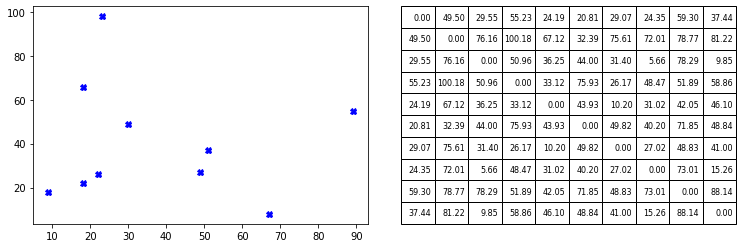

In [3]:
import random, numpy as np, math,  matplotlib.pyplot as plt
# place cities in random positions
num_cities=10

def get_distances():
    distances = np.zeros((num_cities,num_cities))
    for row in range (num_cities):
        for col in range (num_cities):
            if(row != col):
                xdist = cities[row][0] - cities[col][0] 
                ydist = cities[row][1] - cities[col][1]
                distances[row][col] = math.sqrt ( xdist*xdist + ydist*ydist )
    return distances
def plot_cities():
    fig, ax = plt.subplots()        
    for i in range(num_cities):
        ax.plot(cities[i][0], cities[i][1],  'Xb');
    modelstrings = np.array(["%.2f" % x for x in model.reshape(model.size)])
    modelstrings = modelstrings.reshape(model.shape)
    ax.table(cellText = modelstrings, loc = 'right', bbox=[1.1, 0, 1, 1])
    plt.show()
cities = [random.sample(range(100), 2) for x in range(num_cities)];
model = get_distances()
plot_cities()

### Model: the matrix of distances between cities
### Output: A tour that visits each city exactly once

- Condition on output:   Try to minimise tour length

### Optimisation Algorithm: greedy constructive search
- Starts with random city then repeatedly adds edge to closest unvisited city.
- Not very good, but illustrates the point

[4, 7, 2, 8, 5, 6, 0, 3, 9, 1]


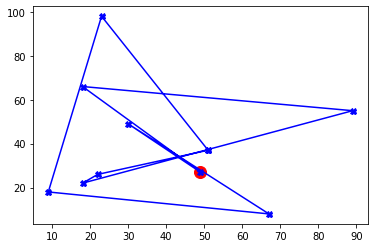

In [4]:
def greedyConstructive(start = 0):
    tour = [-1 for i in range (num_cities)]
    tour[start]=0; 
    #loop through stops on the tour
    for i in range(1,num_cities):
        min_dist = 100000
        #finding the next closest unvisited place
        for k in range(num_cities):
            dist_ik = model[tour[i-1]][k]
            if tour[k] == -1 and  dist_ik < min_dist:
                min_dist = dist_ik
                min_k = k
        tour[min_k] =i
    return(tour)

def show_tour(start=0):
    plt.plot(cities[start][0],cities[start][1],'or',markersize=12)
    plt.plot([cities[tour[i%num_cities]][0] for i in range(num_cities+1)], [cities[tour[i%num_cities ]][1] for i in range(num_cities+1)], 'Xb-')
    plt.show()

start = random.randint(0,num_cities-1)
tour = greedyConstructive(start)
print(tour)
show_tour(start)

# Other example optimisation problems
- finding set of parameters for a design
 - 'look and feel' of a web page via CSS
 - component sizes and materials for physical design
 -  grouping data and methods into classes in software design
- path-finding
- action planning  in games, robotics,...

# Modelling example:
### Learning a model from examples of fruit


In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

fruits = pd.read_csv('data/fruits.csv')

def make_scatter():
    fig, ax = plt.subplots()
    for fruit in ['Apple','Banana','Orange']:
        if (fruit== 'Apple'):
            color = 'green'
        elif (fruit=='Orange'):
            color='orange'
        else:
            color='yellow'
        thisfruitdata = fruits[fruits['Type']==fruit]
        width = thisfruitdata['Width']
        height = thisfruitdata['Height']
        ax.scatter(width,height,c=color,label=fruit)
    ax.legend()
    ax.grid(True)
    plt.show()

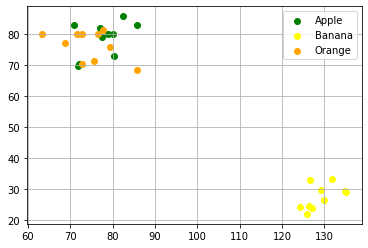

In [9]:
make_scatter()

## Now  split data into features (x) and labels (y)

In [10]:
#fruits.replace(('apple', 'orange'), (1, 0), inplace=True)
#classes = ['apple','orange']
y = fruits['Type'].to_numpy()
x = fruits.drop('Type',axis=1).to_numpy()
featnames = fruits.columns
featnames

Index(['Red', 'Green', 'Blue', 'Width', 'Height', 'Weight', 'Type'], dtype='object')

## Simple Decision Tree Classifier

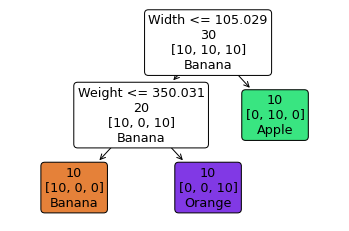

In [11]:
model = DecisionTreeClassifier()
model.fit(x,y)

theTree = plot_tree(model, feature_names = fruits.columns,class_names = ('Banana','Apple','Orange'),label = 'none',filled = True, impurity = False,rounded=True)

# Other Modelling Examples:
- Getting expertise from a person and coding that up in a rule base
 - e.g. a chatbot
 
- more on this in the next video and Weeks 2-4

# Prediction Example: 
## Using the learned model to predict the type of a new bit of fruit
<img style="float:left" src = "figures/types_of_Problem_and_AI/lime.jpg">
 
 - RGB = (50,205,50)
 - size = 4cm, round
-  weight = 44g

In [12]:
newRBG = (50,205,50)
newfruitfeatures = np.array([50,205,50,40,40,44])
prediction = model.predict(newfruitfeatures.reshape(1,-1))
print ( 'prediction  is ' + prediction[0])

prediction  is Apple


# Other prediction examples

- Face Recognition
- Voice Recognition ( Speech To text)
- Auto-captioning videos 
- Time series prediction
 - spread of Covid-19
 - e.g. air quality tomorrow so measures can be taken

# Take Home Message
- Problem solving <=> finding the right choice for the 'missing piece'
- This gives us  a way of:
 - breaking up big problems into little ones
 - identfying what type of problem each sub-problem is
 - and so identifying the right technology to use for that sub-problem
 
## You need to:
- learn the names of the three types of problem, 
- and what kind of question they correspond to
- practise identfying what type of problem you have